# **4) WEATHER AUS**

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler  
import random
import seaborn as sns

Utilizo la librería Pandas para abrir el archivo

In [81]:
w_AUS = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/weatherAUS.csv")

Veo la dimensión del dataset.shape

In [82]:
w_AUS.shape

(145460, 24)

# **A. LIMPEZA DEL DATASET**

In [83]:
w_AUS.head(10);

In [84]:
w_AUS.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Sumo los valores nulos de cada columnA

In [85]:
w_AUS.isnull().sum();

**ELIMINO LOS VALORES NULOS**

In [86]:
w_AUS.dropna(inplace=True)

Compruebo que se hayan eliminado

In [87]:
w_AUS.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Veo la dimensión del dataset.shape una vez eliminados los valores nulos

In [88]:
w_AUS.shape

(56420, 24)

# **B. FILTRO COLUMNAS**

Filtro columnas para que queden sólo las siguientes variables: Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [89]:
# Elimino las que no voy a utilizar. 
w_AUS_filtro = w_AUS.drop(["Date", "Location", "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm", "RainToday", "RISK_MM", "RainTomorrow"], axis=1)


MATRIZ DE CORRELACIÓN

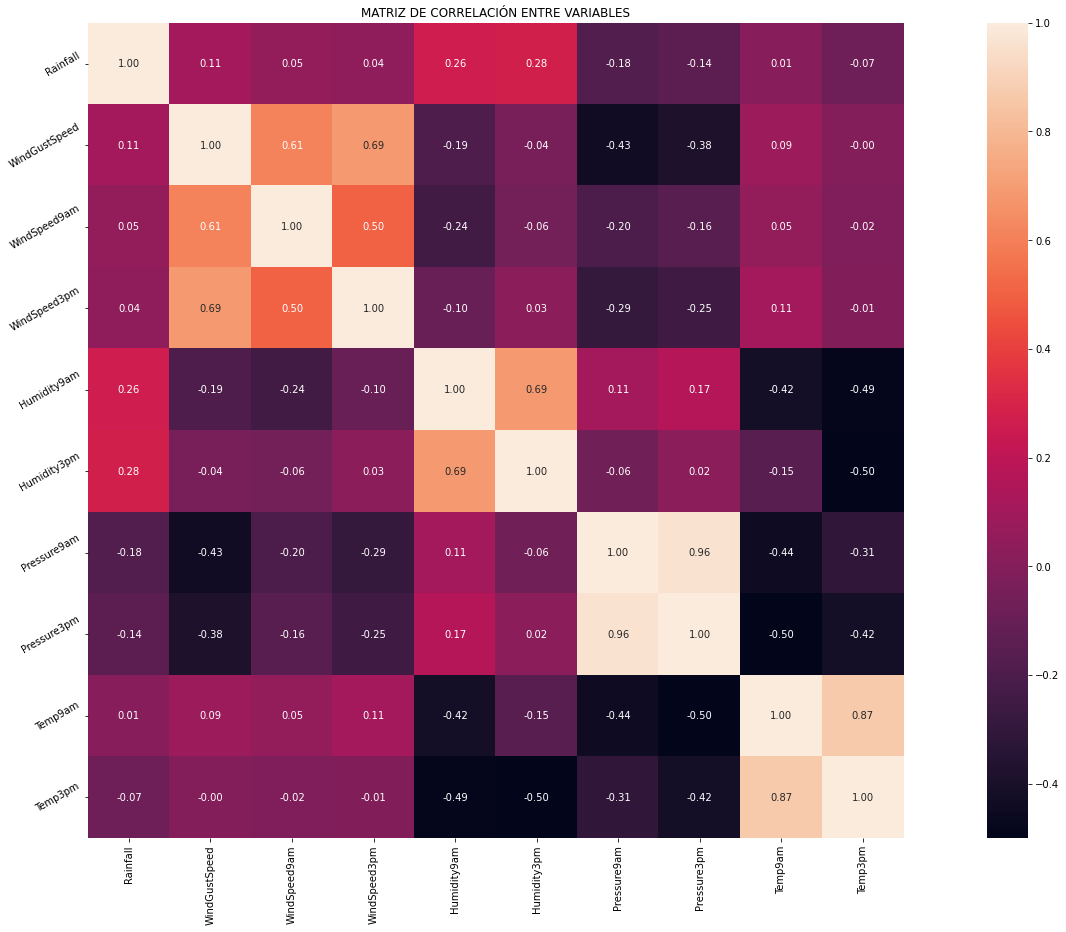

In [90]:
w_AUS_filtro.corr()
correlation = w_AUS_filtro.corr()
plt.figure(figsize=(30,15))
plt.title('MATRIZ DE CORRELACIÓN ENTRE VARIABLES')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**NORMALIZO**

In [91]:
# Tres alternativas:

# 1. Normalizo utilizando StandardScaler()
NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(w_AUS_filtro)  
    x= scaler.transform(w_AUS_filtro)

# 2. Normalizo con zcore: w_AUS_norm1 = (x - x.mean()) / x.std();

# 3. Normalizo con min y max. ej.: x_AUS_norm2 = (x - x.min()) / (x.max() - x.min())

**OBSERVACIÓN**:

Temp9am, Temp3pm están altamente correlacionados positivamente.

Pressure3pm y Pressure9am también.

# **C. PREDIGO LAS DIFERENTES VARIABLES DE FORMA INDIVIDUAL**

# **D. ANALIZO QUE VARIABLE ES MÁS INFLUYENTE PARA CADA FEATURE**

# 1. RAINFALL

DEFINO LAS VARIABLES DE LOS DATASETS PARA NORMALIZARLOS

In [92]:
x1 = w_AUS_filtro.drop("Rainfall", axis=1)
y1 = w_AUS_filtro['Rainfall']
n, d = x1.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

El dataset tiene 56420 registros, de 9 dimensiones


ENTRENO EL MODELO DE REGRESIÓN LINEAL

In [93]:
modelo= LinearRegression()

modelo.fit(x1, y1)

y1_predict= modelo.predict(x1)

mse_error1 = mean_squared_error(y1_predict, y1)
print("Error cuadrático medio: %.2f" % mse_error1)

mae_error1 = mean_absolute_error(y1_predict, y1)
print("Error absoluto medio: %.2f" % mae_error1)

r2_s1 = r2_score(y1, y1_predict) # Devuelve como se ajustan estas dos variables.
print("r2_score: %.2f" % r2_s1)

Error cuadrático medio: 42.26
Error absoluto medio: 3.12
r2_score: 0.14


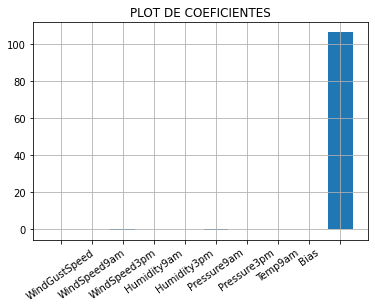

In [94]:
w1 = modelo.coef_
b1 = modelo.intercept_
d1 = x1.shape[1]
plt.bar(range(d1+1), np.concatenate((w1,[b1])));
labels1 = x1.columns.values; labels1[-1]= 'Bias'
plt.xticks(range(w1.shape[0]+1), labels1, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

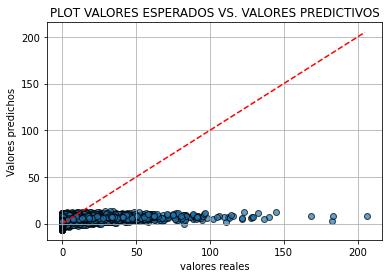

In [95]:
plt.figure()
xx1= range(round(y1.min()),round(y1.max()))
plt.scatter(y1, y1_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx1, xx1, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 2. WINDGUSTSPEED

In [103]:
x2 = w_AUS_filtro.drop('WindGustSpeed', axis=1)
y2 = w_AUS_filtro['WindGustSpeed']
n, d = x2.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x2, y2)

y2_predict= modelo.predict(x2)

mse_error2 = mean_squared_error(y2_predict, y2)
print("Error cuadrático medio: %.2f" % mse_error2)

mae_error2 = mean_absolute_error(y2_predict, y2)
print("Error absoluto medio: %.2f" % mae_error2)

r2_s2 = r2_score(y2, y2_predict)
print("r2_score: %.2f" % r2_s2)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 65.24
Error absoluto medio: 5.96
r2_score: 0.63


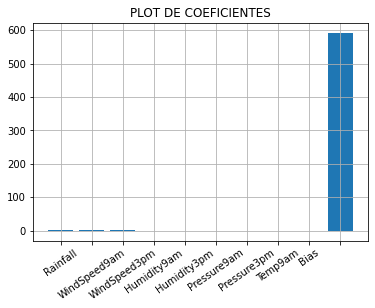

In [104]:
w2 = modelo.coef_
b2 = modelo.intercept_
d2 = x2.shape[1]
plt.bar(range(d+1), np.concatenate((w2,[b2])));
labels2 = x2.columns.values; labels2[-1]= 'Bias'
plt.xticks(range(w2.shape[0]+1), labels2, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

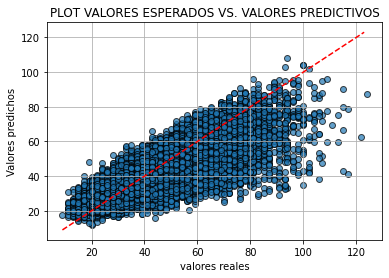

In [105]:
plt.figure()
xx2= range(round(y2.min()),round(y2.max()))
plt.scatter(y2, y2_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx2, xx2, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 3. WINDSPEED9AM

In [106]:
x3 = w_AUS_filtro.drop('WindSpeed9am', axis=1)
y3 = w_AUS_filtro['WindSpeed9am']
n, d = x3.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x3, y3)

y3_predict= modelo.predict(x3)

mse_error3 = mean_squared_error(y3_predict, y3)
print("Error cuadrático medio: %.2f" % mse_error3)

mae_error3 = mean_absolute_error(y3_predict, y3)
print("Error absoluto medio: %.2f" % mae_error3)

r2_s3 = r2_score(y3, y3_predict)
print("r2_score: %.2f" % r2_s3)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 40.06
Error absoluto medio: 4.96
r2_score: 0.42


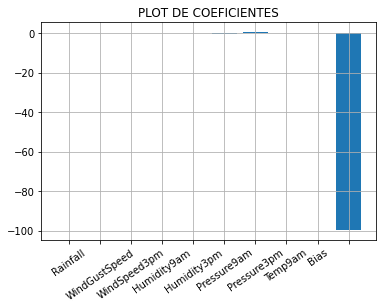

In [107]:
w3 = modelo.coef_
b3 = modelo.intercept_
d3 = x3.shape[1]
plt.bar(range(d3+1), np.concatenate((w3,[b3])));
labels3 = x3.columns.values; labels3[-1]= 'Bias'
plt.xticks(range(w3.shape[0]+1), labels3, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

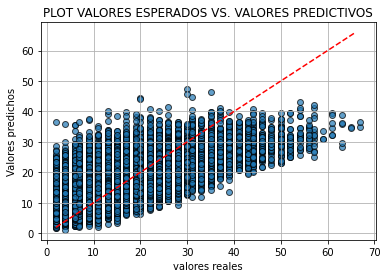

In [108]:
plt.figure()
xx3= range(round(y3.min()),round(y3.max()))
plt.scatter(y3, y3_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx3, xx3, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 4. WINDSPEED3PM

In [109]:
x4 = w_AUS_filtro.drop('WindSpeed3pm', axis=1)
y4 = w_AUS_filtro['WindSpeed3pm']
n, d = x4.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x4, y4)

y4_predict= modelo.predict(x4)

mse_error4 = mean_squared_error(y4_predict, y4)
print("Error cuadrático medio: %.2f" % mse_error4)

mae_error4 = mean_absolute_error(y4_predict, y4)
print("Error absoluto medio: %.2f" % mae_error4)

r2_s4 = r2_score(y4, y4_predict)
print("r2_score: %.2f" % r2_s4)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 35.39
Error absoluto medio: 4.62
r2_score: 0.51


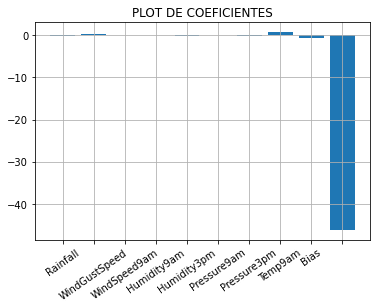

In [110]:
w4 = modelo.coef_
b4 = modelo.intercept_
d4 = x4.shape[1]
plt.bar(range(d4+1), np.concatenate((w4,[b4])));
labels4 = x4.columns.values; labels4[-1]= 'Bias'
plt.xticks(range(w4.shape[0]+1), labels4, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

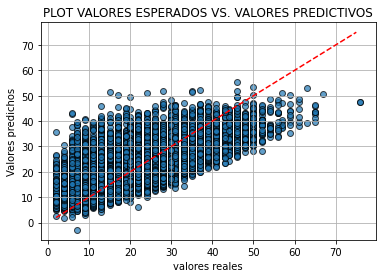

In [111]:
plt.figure()
xx4= range(round(y4.min()),round(y4.max()))
plt.scatter(y4, y4_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx4, xx4, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 5. HUMIDITY9AM

In [112]:
x5 = w_AUS_filtro.drop('Humidity9am', axis=1)
y5 = w_AUS_filtro['Humidity9am']
n, d = x5.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x5, y5)

y5_predict= modelo.predict(x5)

mse_error5 = mean_squared_error(y5_predict, y5)
print("Error cuadrático medio: %.2f" % mse_error5)

mae_error5 = mean_absolute_error(y5_predict, y5)
print("Error absoluto medio: %.2f" % mae_error5)

r2_s5 = r2_score(y5, y5_predict)
print("r2_score: %.2f" % r2_s5)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 94.13
Error absoluto medio: 7.48
r2_score: 0.73


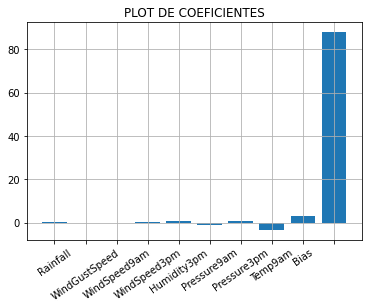

In [113]:
w5 = modelo.coef_
b5 = modelo.intercept_
d5 = x5.shape[1]
plt.bar(range(d5+1), np.concatenate((w5,[b5])));
labels5 = x5.columns.values; labels5[-1]= 'Bias'
plt.xticks(range(w5.shape[0]+1), labels5, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

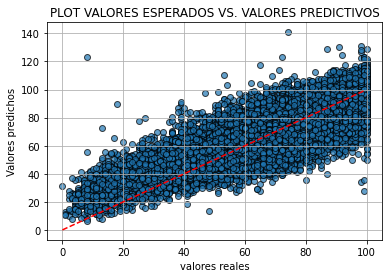

In [114]:
plt.figure()
xx5= range(round(y5.min()),round(y5.max()))
plt.scatter(y5, y5_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx5, xx5, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 6. HUMIDITY3PM

In [115]:
x6 = w_AUS_filtro.drop('Humidity3pm', axis=1)
y6 = w_AUS_filtro['Humidity3pm']
n, d = x6.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x6, y6)

y6_predict= modelo.predict(x6)

mse_error6 = mean_squared_error(y6_predict, y6)
print("Error cuadrático medio: %.2f" % mse_error6)

mae_error6 = mean_absolute_error(y6_predict, y6)
print("Error absoluto medio: %.2f" % mae_error6)

r2_s6 = r2_score(y6, y6_predict)
print("r2_score: %.2f" % r2_s6)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 65.74
Error absoluto medio: 6.19
r2_score: 0.84


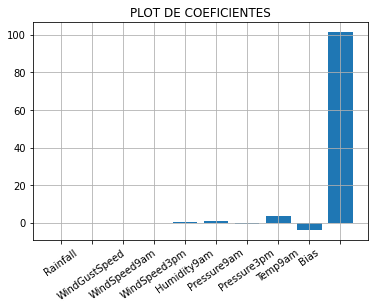

In [116]:
w6 = modelo.coef_
b6 = modelo.intercept_
d6 = x6.shape[1]
plt.bar(range(d6+1), np.concatenate((w6,[b6])));
labels6 = x6.columns.values; labels6[-1]= 'Bias'
plt.xticks(range(w6.shape[0]+1), labels6, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

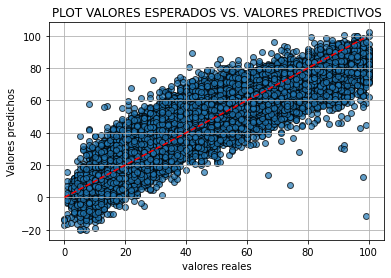

In [117]:
plt.figure()
xx6= range(round(y6.min()),round(y6.max()))
plt.scatter(y6, y6_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx6, xx6, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 7. PRESSURE9AM

In [118]:
x7 = w_AUS_filtro.drop('Pressure9am', axis=1)
y7 = w_AUS_filtro['Pressure9am']
n, d = x7.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x7, y7)

y7_predict= modelo.predict(x7)

mse_error7 = mean_squared_error(y7_predict, y7)
print("Error cuadrático medio: %.2f" % mse_error7)

mae_error7 = mean_absolute_error(y7_predict, y7)
print("Error absoluto medio: %.2f" % mae_error7)

r2_s7 = r2_score(y7, y7_predict)
print("r2_score: %.2f" % r2_s7)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.58
Error absoluto medio: 1.21
r2_score: 0.95


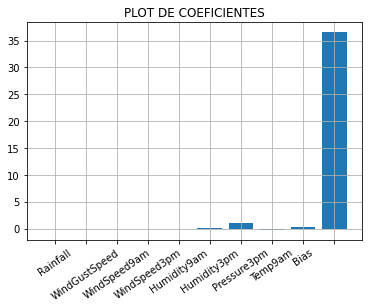

In [119]:
w7 = modelo.coef_
b7 = modelo.intercept_
d7 = x7.shape[1]
plt.bar(range(d7+1), np.concatenate((w7,[b7])));
labels7 = x7.columns.values; labels7[-1]= 'Bias'
plt.xticks(range(w7.shape[0]+1), labels7, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

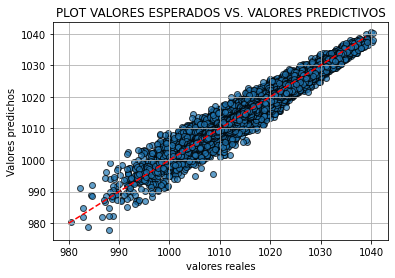

In [120]:
plt.figure()
xx7= range(round(y7.min()),round(y7.max()))
plt.scatter(y7, y7_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx7, xx7, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 8. PRESSURE3PM

In [121]:
x8 = w_AUS_filtro.drop('Pressure3pm', axis=1)
y8 = w_AUS_filtro['Pressure3pm']
n, d = x8.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x8, y8)

y8_predict= modelo.predict(x8)

mse_error8 = mean_squared_error(y8_predict, y8)
print("Error cuadrático medio: %.2f" % mse_error8)

mae_error8 = mean_absolute_error(y8_predict, y8)
print("Error absoluto medio: %.2f" % mae_error8)

r2_s8 = r2_score(y8, y8_predict)
print("r2_score: %.2f" % r2_s8)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.53
Error absoluto medio: 1.19
r2_score: 0.95


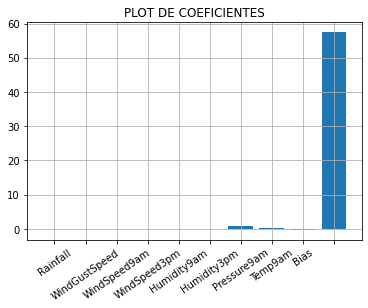

In [122]:
w8 = modelo.coef_
b8 = modelo.intercept_
d8 = x8.shape[1]
plt.bar(range(d8+1), np.concatenate((w8,[b8])));
labels8 = x8.columns.values; labels8[-1]= 'Bias'
plt.xticks(range(w8.shape[0]+1), labels8, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

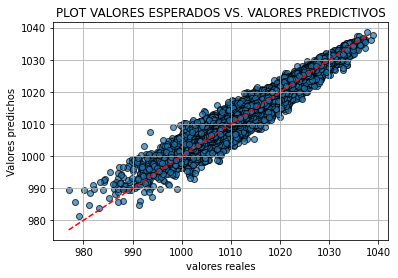

In [123]:
plt.figure()
xx8= range(round(y8.min()),round(y8.max()))
plt.scatter(y8, y8_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx8, xx8, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 9. TEMP9AM

In [124]:
x9 = w_AUS_filtro.drop('Temp9am', axis=1)
y9 = w_AUS_filtro['Temp9am']
n, d = x9.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x9, y9)

y9_predict= modelo.predict(x9)

mse_error9 = mean_squared_error(y9_predict, y9)
print("Error cuadrático medio: %.2f" % mse_error9)

mae_error9 = mean_absolute_error(y9_predict, y9)
print("Error absoluto medio: %.2f" % mae_error9)

r2_s9 = r2_score(y9, y9_predict)
print("r2_score: %.2f" % r2_s9)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 3.01
Error absoluto medio: 1.34
r2_score: 0.93


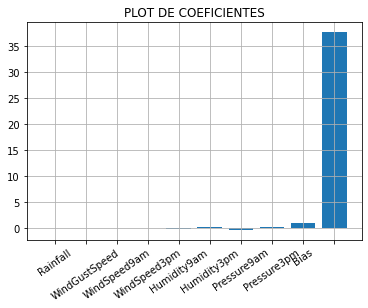

In [125]:
w9 = modelo.coef_
b9 = modelo.intercept_
d9 = x9.shape[1]
plt.bar(range(d9+1), np.concatenate((w9,[b9])));
labels9 = x9.columns.values; labels9[-1]= 'Bias'
plt.xticks(range(w9.shape[0]+1), labels9, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

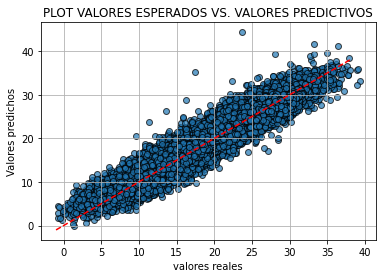

In [126]:
plt.figure()
xx9= range(round(y9.min()),round(y9.max()))
plt.scatter(y9, y9_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx9, xx9, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

# 10. TEMP3PM

In [127]:
x10 = w_AUS_filtro.drop('Temp3pm', axis=1)
y10 = w_AUS_filtro['Temp3pm']
n, d = x10.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

modelo= LinearRegression()

modelo.fit(x10, y10)

y10_predict= modelo.predict(x10)

mse_error10 = mean_squared_error(y10_predict, y10)
print("Error cuadrático medio: %.2f" % mse_error10)

mae_error10 = mean_absolute_error(y10_predict, y10)
print("Error absoluto medio: %.2f" % mae_error10)

r2_s10 = r2_score(y10, y10_predict)
print("r2_score: %.2f" % r2_s10)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.86
Error absoluto medio: 1.30
r2_score: 0.94


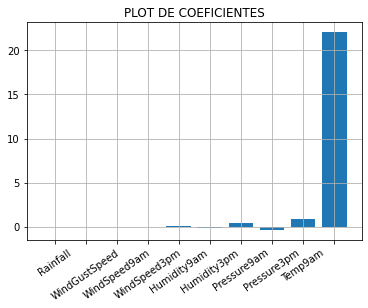

In [128]:
w10 = modelo.coef_
b10 = modelo.intercept_
d10 = x10.shape[1]
plt.bar(range(d10+1), np.concatenate((w10,[b10])));
labels10 = x10.columns.values; labels9[-1]= 'Bias'
plt.xticks(range(w10.shape[0]+1), labels10, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

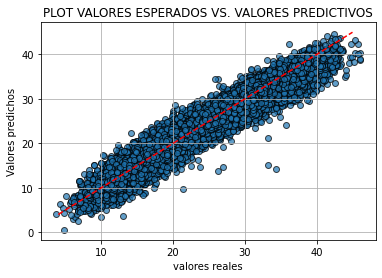

In [130]:
plt.figure()
xx10= range(round(y10.min()),round(y10.max()))
plt.scatter(y10, y10_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx10, xx10, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");